<p style="height:100px;line-height:100px;background-color:lime;padding-left:12px;font-size:46px;font-family:serif;font-weight:bold;color:white;">
    Causes of Death in France from 2001 to 2008
</p>

# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpp
%matplotlib inline
import seaborn as sb
from sqlalchemy import create_engine

# Reading the Data

In [2]:
engine = create_engine('sqlite:///../DataSets/CausesOfDeath_France_2001-2008.db')

In [3]:
with engine.connect() as conn, conn.begin():
    data = pd.read_sql_table('CausesOfDeath_France_2001-2008', conn)

In [4]:
cause_of_death = data

In [5]:
cause_of_death = cause_of_death.set_axis(cause_of_death.iloc[0, :], axis=1).iloc[1:, :]

In [6]:
cause_of_death.shape

(1056, 8)

# Exploring the Data

In [7]:
cause_of_death.head()

,TIME,GEO,UNIT,SEX,AGE,ICD10,Value,Flag and Footnotes
1,2001,France,Number,Males,Total,All causes of death (A00-Y89) excluding S00-T98,277 858,None
2,2001,France,Number,Males,Total,Certain infectious and parasitic diseases (A00...,5 347,None
3,2001,France,Number,Males,Total,Tuberculosis,545,None
4,2001,France,Number,Males,Total,Meningococcal infection,30,None
5,2001,France,Number,Males,Total,Viral hepatitis,471,None


In [8]:
cause_of_death.dtypes

0
TIME                  object
GEO                   object
UNIT                  object
SEX                   object
AGE                   object
ICD10                 object
Value                 object
Flag and Footnotes    object
dtype: object

In [9]:
cause_of_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 1 to 1056
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   TIME                1056 non-null   object
 1   GEO                 1056 non-null   object
 2   UNIT                1056 non-null   object
 3   SEX                 1056 non-null   object
 4   AGE                 1056 non-null   object
 5   ICD10               1056 non-null   object
 6   Value               1056 non-null   object
 7   Flag and Footnotes  0 non-null      object
dtypes: object(8)
memory usage: 66.1+ KB


In [10]:
cause_of_death.describe()

,TIME,GEO,UNIT,SEX,AGE,ICD10,Value,Flag and Footnotes
count,1056,1056,1056,1056,1056,1056,1056,0
unique,8,1,1,2,1,66,945,0
top,2004,France,Number,Females,Total,Falls,:,NaN
freq,132,1056,1056,528,1056,16,40,NaN


In [11]:
cause_of_death.isna().sum()

0
TIME                     0
GEO                      0
UNIT                     0
SEX                      0
AGE                      0
ICD10                    0
Value                    0
Flag and Footnotes    1056
dtype: int64

# Data Cleaning

In [12]:
cause_of_death['Value'] = cause_of_death['Value'].replace(':', '0').apply(lambda x : x.replace(' ', '')).astype('int64')

In [13]:
cause_of_death['Value'].describe()

count      1056.000000
mean      12069.661932
std       35896.576873
min           0.000000
25%         479.500000
50%        2606.000000
75%        7729.500000
max      284729.000000
Name: Value, dtype: float64

In [14]:
cause_of_death['Flag and Footnotes'].value_counts()

Series([], Name: Flag and Footnotes, dtype: int64)

In [15]:
cause_of_death = cause_of_death.dropna(axis=1)
#Or
#cause_of_death = cause_of_death.iloc[:, :-1]

# Grouping Data

In [16]:
group_all = cause_of_death.groupby(['TIME', 'SEX', 'ICD10'])['Value'].sum().unstack()
group_all

ICD10         Accidental poisoning by and exposure to noxious substances  \
TIME SEX                                                                   
2001 Females                                                496            
     Males                                                  459            
2002 Females                                                458            
     Males                                                  405            
2003 Females                                                507            
     Males                                                  513            
2004 Females                                                466            
     Males                                                  467            
2005 Females                                                464            
     Males                                                  571            
2006 Females                                                510            
     Males                                                  555            
2007 Females                                                517            
     Males                                                  709            
2008 Females                                                630            
     Males                                                  785            

ICD10         Accidents  All causes of death (A00-Y89) excluding S00-T98  \
TIME SEX                                                                   
2001 Females      13165                                           263325   
     Males        15867                                           277858   
2002 Females      12693                                           266555   
     Males        15515                                           278794   
2003 Females      13624                                           277858   
     Males        15299                                           284729   
2004 Females      11078                                           250788   
     Males        13599                                           268653   
2005 Females      11370                                           261633   
     Males        13944                                           276553   
2006 Females      10861                                           255160   
     Males        13524                                           271406   
2007 Females      10951                                           257419   
     Males        13585                                           273401   
2008 Females      11051                                           265541   
     Males        13815                                           277598   

ICD10         Assault  Asthma and status asthmaticus  \
TIME SEX                                               
2001 Females      210                            871   
     Males        324                            647   
2002 Females      211                            872   
     Males        325                            559   
2003 Females      197                            895   
     Males        306                            516   
2004 Females      213                            753   
     Males        311                            410   
2005 Females      168                            758   
     Males        326                            433   
2006 Females      159                            657   
     Males        327                            388   
2007 Females      166                            694   
     Males        268                            368   
2008 Females      166                            613   
     Males        347                            336   

ICD10         Cerebrovascular diseases  \
TIME SEX                                 
2001 Females                     22599   
     Males                       16223   
2002 Females                     21835   
     Males                       15948   
2

In [17]:
group_by_time = cause_of_death.groupby('TIME')['Value'].sum()
group_by_time

TIME
2001    1604535
2002    1614829
2003    1654533
2004    1543399
2005    1593926
2006    1560637
2007    1570876
2008    1602828
Name: Value, dtype: int64

In [18]:
group_by_sex = cause_of_death.groupby('SEX')['Value'].sum()
group_by_sex

SEX
Females    6002261
Males      6743302
Name: Value, dtype: int64

In [19]:
group_by_icd10 = cause_of_death.groupby('ICD10')['Value'].sum()
group_by_icd10

ICD10
Accidental poisoning by and exposure to noxious substances                                              8512
Accidents                                                                                             209941
All causes of death (A00-Y89) excluding S00-T98                                                      4307271
Assault                                                                                                 4024
Asthma and status asthmaticus                                                                           9770
                                                                                                      ...   
Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)     288164
Transport accidents (V01-V99)                                                                          47586
Tuberculosis                                                                                            6765
Ulcer of stom

In [20]:
group_by_time_sex = cause_of_death.groupby(['TIME', 'SEX'])['Value'].sum().unstack()
group_by_time_sex['YEAR'] = list(group_by_time_sex.index)
group_by_time_sex

SEX,Females,Males,YEAR
TIME,,,
2001,754350,850185,2001
2002,762364,852465,2002
2003,788678,865855,2003
2004,720533,822866,2004
2005,749342,844584,2005
2006,731646,828991,2006
2007,736707,834169,2007
2008,758641,844187,2008


# Data Visualization

In [21]:
time_sex = cause_of_death.groupby(['TIME', 'SEX'])['Value'].sum().unstack()

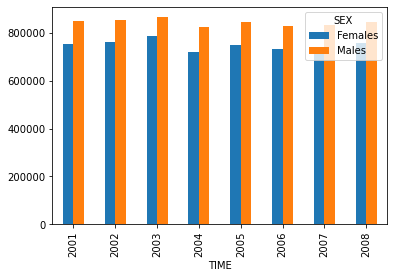

In [22]:
time_sex.plot(kind='bar')

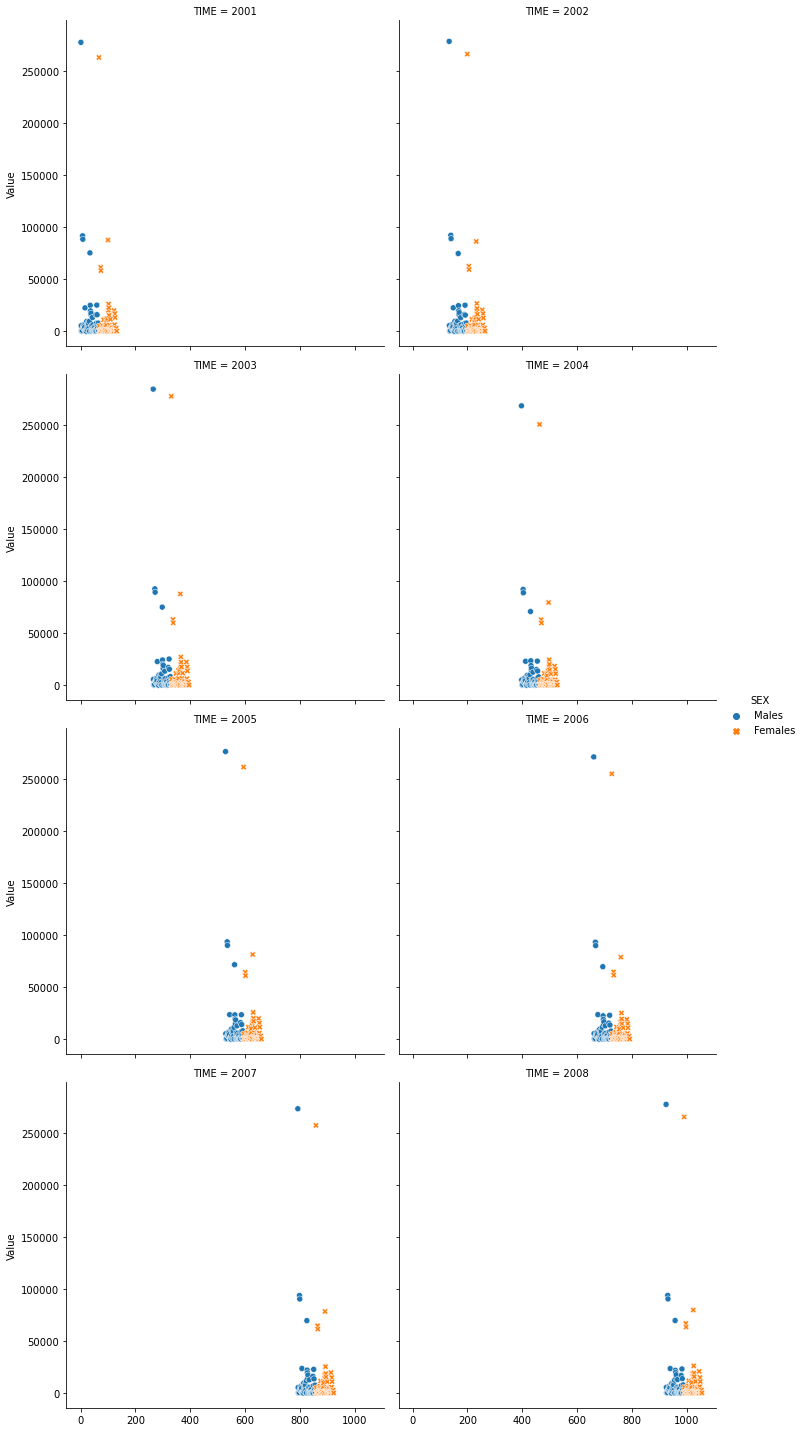

In [23]:
sb.relplot(data=cause_of_death, x=cause_of_death.index, y='Value', hue='SEX', style='SEX', col='TIME', col_wrap=2)

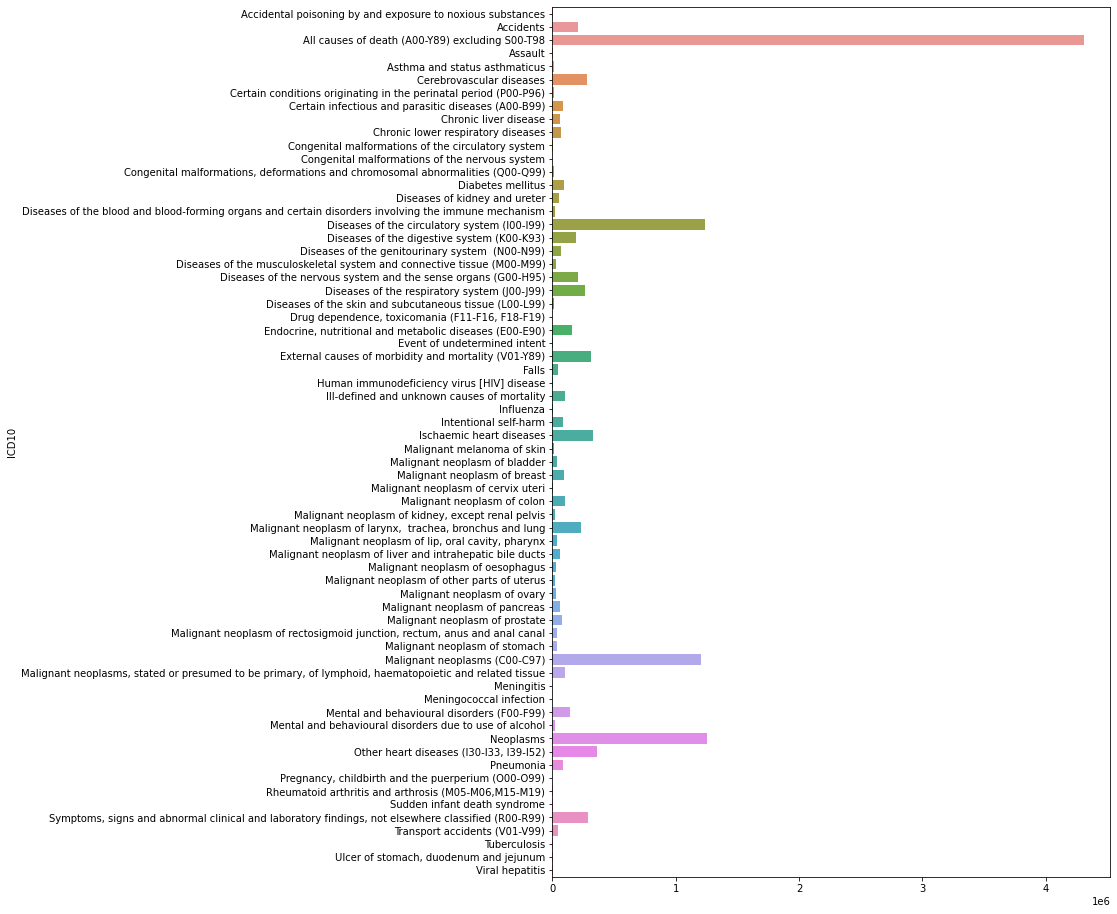

In [24]:
mpp.figure(figsize=(10, 16))
sb.barplot(x=group_by_icd10.values, y=group_by_icd10.index)
mpp.show()

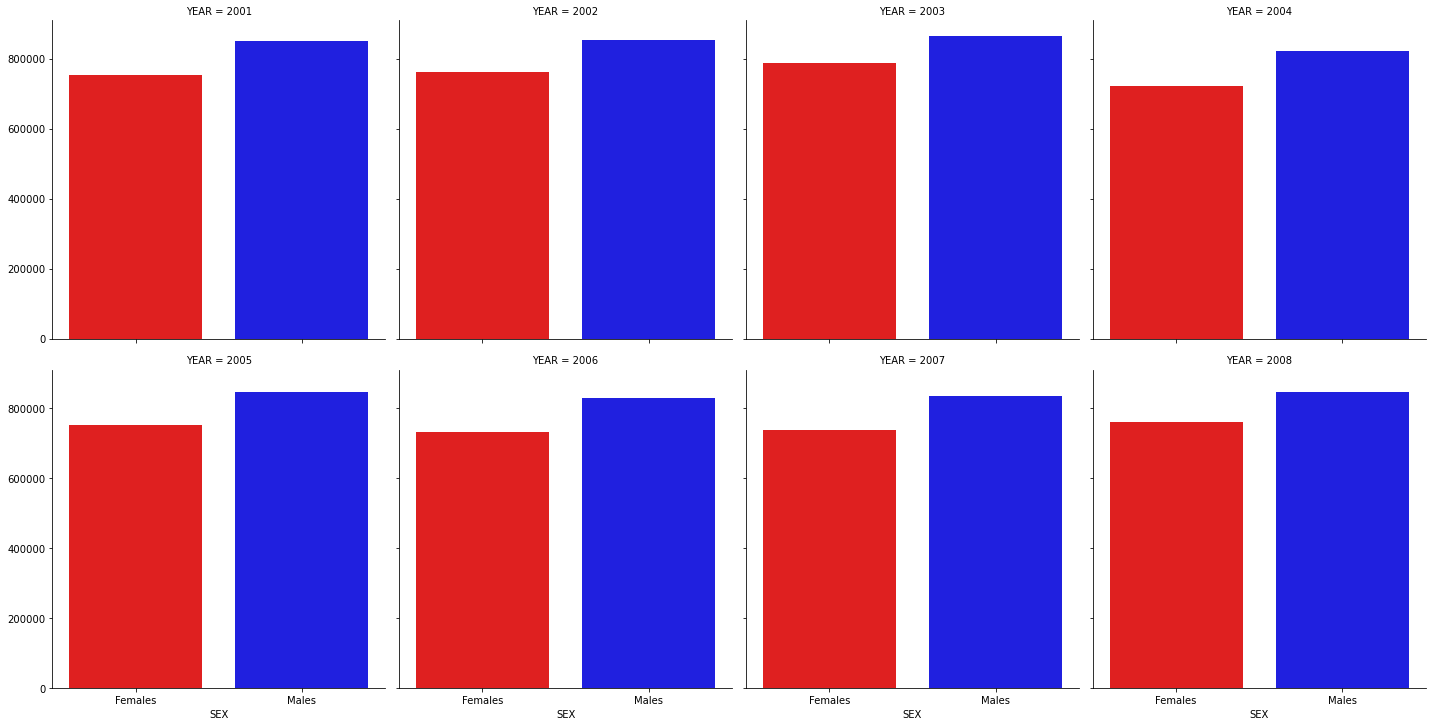

In [25]:
sb.catplot(data=group_by_time_sex, kind='bar', col='YEAR', col_wrap=4, palette=['red', 'blue'])

<p style="height:240px;line-height:100px;font-size:64px;background-color:cyan;color:white;padding:20px auto;text-align:center;border:2px outset gold;border-radius:8px;">
    Created by:<br/> <code>Tarek Ghajary</code>
</p>